In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)


In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20

In [3]:
df = pd.read_csv("data/인구수,병원수,의사수,병상수.csv",encoding = 'utf-8-sig')

In [4]:
df.columns

Index(['행정구역', '총인구수', '60세 이상 인구수', '60세 이상 인구수 비율', '총의사수', '총병상수', '총병원수'], dtype='object')

In [5]:
a =['행정구역', '총인구수', '60세 이상 인구수', '60세 이상 인구수 비율', '총의사수', '총병상수', '총병원수']

In [6]:
for i in a:
    df[i] = df[i].replace(",",'')

In [7]:
for i in a:
    df[i] = df[i].astype('float',errors='ignore')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역           229 non-null    object 
 1   총인구수           229 non-null    float64
 2   60세 이상 인구수     229 non-null    float64
 3   60세 이상 인구수 비율  229 non-null    float64
 4   총의사수           229 non-null    float64
 5   총병상수           229 non-null    float64
 6   총병원수           229 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.6+ KB


In [9]:
#행정구역 번호 삭제
df['행정구역'] = df['행정구역'].str.split(' ').str[0:2].str.join(' ')

In [10]:
df['천명당의료기관수'] = (df['총병원수']/df['총인구수'])*1000

In [11]:
df['천명당의사수'] = (df['총의사수']/df['총인구수'])*1000

In [12]:
df['천명당병상수'] = (df['총병상수']/df['총인구수'])*1000

In [13]:
#도 추출 
df['도'] = df['행정구역'].str.split(' ').str[0]

In [14]:
a=(df['60세 이상 인구수 비율'] > 50)

In [15]:
b=df.loc[a,:].sort_values('60세 이상 인구수 비율',ascending=False)
b

,행정구역,총인구수,60세 이상 인구수,60세 이상 인구수 비율,총의사수,총병상수,총병원수,천명당의료기관수,천명당의사수,천명당병상수,도
228,경상북도 의성군,50609.0,28429.0,56.173803,95.0,1572.0,82.0,1.620265,1.877136,31.061669,경상북도
227,경상북도 군위군,23314.0,12882.0,55.254354,32.0,125.0,35.0,1.501244,1.372566,5.361585,경상북도
226,경상남도 합천군,42613.0,22939.0,53.830991,92.0,1028.0,78.0,1.830427,2.158966,24.124094,경상남도
225,전라남도 고흥군,62530.0,33608.0,53.747001,138.0,1844.0,107.0,1.711179,2.206941,29.489845,전라남도
224,경상북도 청도군,41734.0,21904.0,52.484785,92.0,1570.0,69.0,1.653328,2.204438,37.619207,경상북도
223,경상북도 청송군,24555.0,12765.0,51.985339,52.0,391.0,43.0,1.751171,2.117695,15.923437,경상북도
222,경상북도 봉화군,30572.0,15770.0,51.583148,45.0,352.0,36.0,1.177548,1.471935,11.513803,경상북도
221,경상남도 산청군,34196.0,17593.0,51.447538,64.0,412.0,60.0,1.754591,1.871564,12.048193,경상남도
220,경상북도 영양군,16263.0,8318.0,51.146775,26.0,73.0,21.0,1.291275,1.598721,4.488717,경상북도
219,전라남도 보성군,39183.0,20039.0,51.142077,103.0,1630.0,75.0,1.914095,2.628691,41.599673,전라남도


In [16]:
a=b.groupby(["행정구역"])[['60세 이상 인구수 비율']].mean().sort_values("60세 이상 인구수 비율",ascending=False)

In [17]:
#고령화 비율 50% 이상 지역 표
a

,60세 이상 인구수 비율
행정구역,
경상북도 의성군,56.173803
경상북도 군위군,55.254354
경상남도 합천군,53.830991
전라남도 고흥군,53.747001
경상북도 청도군,52.484785
경상북도 청송군,51.985339
경상북도 봉화군,51.583148
경상남도 산청군,51.447538
경상북도 영양군,51.146775


(40.0, 60.0)

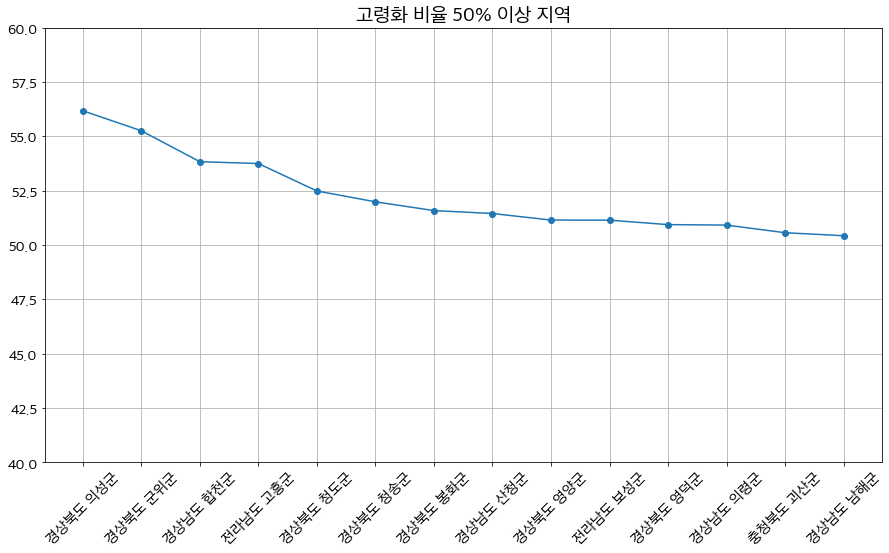

In [18]:
#고령화 비율 50% 이상 지역
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(a.index, a['60세 이상 인구수 비율'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 50% 이상 지역",size=20)
plt.ylim(40,60)

In [19]:
#고령화 비율 50% 이상 지역 천명당 의사수 
a = b.groupby(["행정구역"])[['천명당의사수']].mean().sort_values("천명당의사수",ascending=False)

(0.0, 4.0)

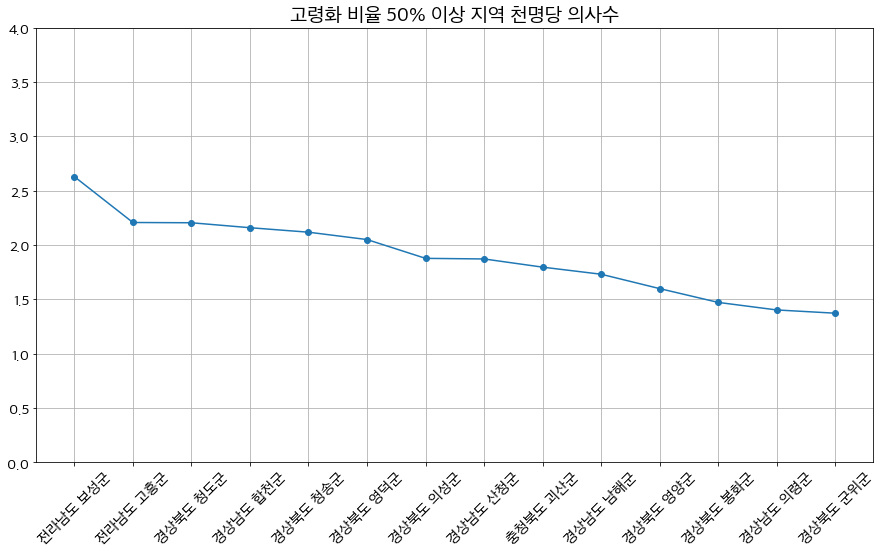

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(a.index, a['천명당의사수'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 50% 이상 지역 천명당 의사수",size=20)
plt.ylim(0,4)

In [21]:
#고령화 비율 50% 이상 지역 천명당 의료기관수
a = b.groupby(["행정구역"])[['천명당의료기관수']].mean().sort_values("천명당의료기관수",ascending=False)

(0.0, 3.0)

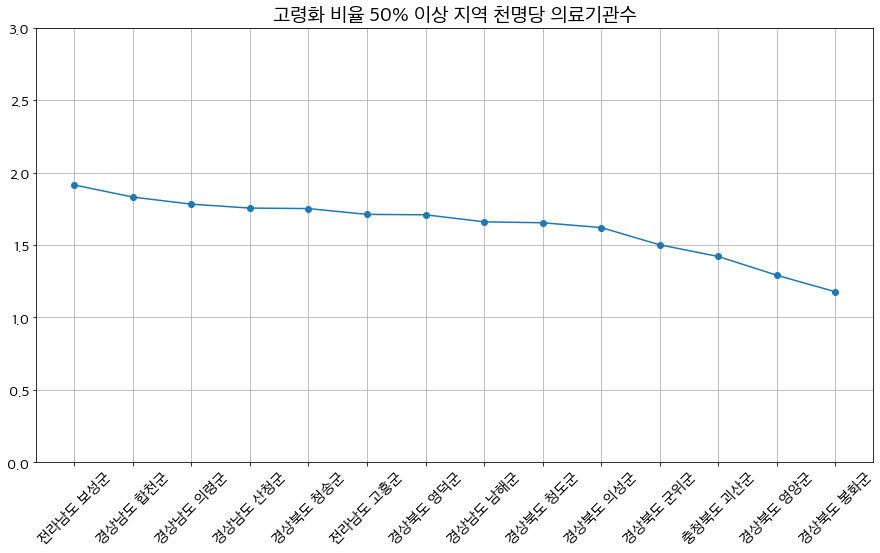

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(a.index, a['천명당의료기관수'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 50% 이상 지역 천명당 의료기관수",size=20)
plt.ylim(0,3)

In [23]:
#고령화 비율 50% 이상 지역 천명당 병상수
a = b.groupby(["행정구역"])[['천명당병상수']].mean().sort_values("천명당병상수",ascending=False)

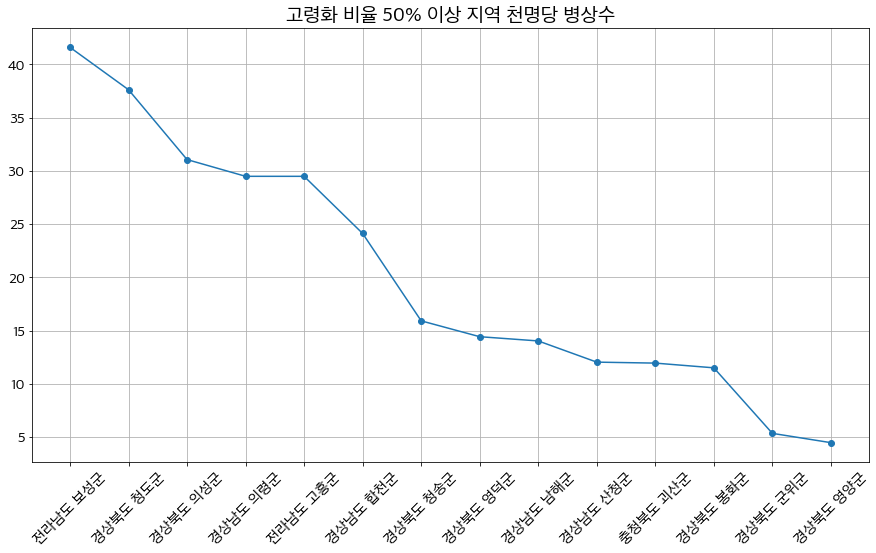

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(a.index, a['천명당병상수'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 50% 이상 지역 천명당 병상수",size=20);

In [25]:
qq = df.sort_values('60세 이상 인구수 비율').head(10)

In [26]:
qq

,행정구역,총인구수,60세 이상 인구수,60세 이상 인구수 비율,총의사수,총병상수,총병원수,천명당의료기관수,천명당의사수,천명당병상수,도
0,경기도 화성시,892038.0,132907.0,14.899253,1697.0,7700.0,878.0,0.984263,1.902385,8.631919,경기도
1,세종특별자치시,378196.0,58616.0,15.000000,742.0,3161.0,417.0,1.102603,1.961946,8.358100,세종특별자치시
2,광주광역시 광산구,402998.0,63612.0,15.784694,1064.0,11275.0,498.0,1.235738,2.640212,27.977806,광주광역시
3,울산광역시 북구,218947.0,35057.0,16.011638,277.0,2038.0,178.0,0.812982,1.265146,9.308189,울산광역시
4,경기도 오산시,230028.0,37824.0,16.443216,464.0,3529.0,236.0,1.025962,2.017146,15.341611,경기도
5,경기도 시흥시,512721.0,87118.0,16.991307,928.0,6365.0,529.0,1.031750,1.809951,12.414159,경기도
6,대전광역시 유성구,352557.0,59939.0,17.001223,875.0,5615.0,480.0,1.361482,2.481868,15.926503,대전광역시
7,경상북도 구미시,409935.0,70984.0,17.315916,824.0,4981.0,454.0,1.107493,2.010075,12.150707,경상북도
8,인천광역시 연수구,388284.0,69662.0,17.940992,721.0,2614.0,430.0,1.107437,1.856888,6.732186,인천광역시
9,충청남도 천안시,657080.0,121467.0,18.485877,2213.0,11628.0,812.0,1.235770,3.367931,17.696475,충청남도


(0.0, 4.0)

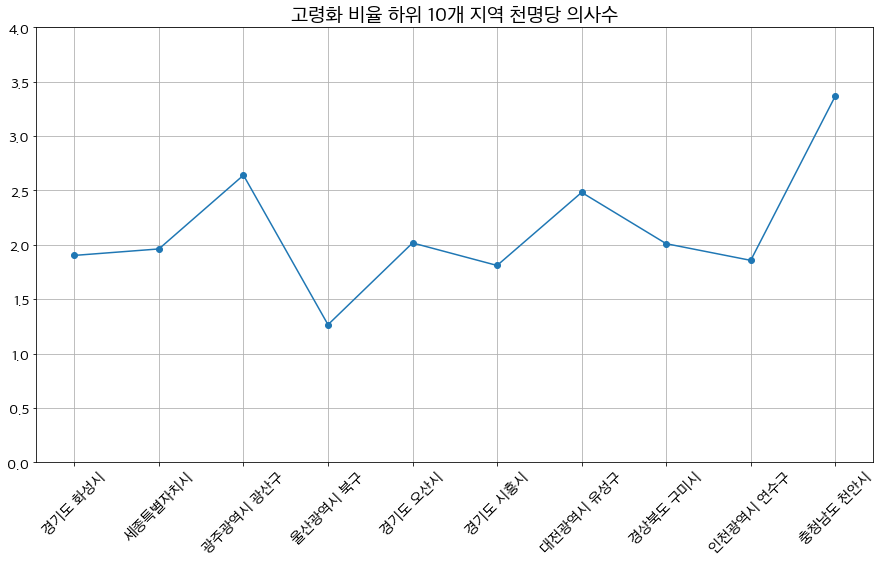

In [27]:
#의사수
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(qq['행정구역'], qq['천명당의사수'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 하위 10개 지역 천명당 의사수",size=20)
plt.ylim(0,4)

(0.0, 3.0)

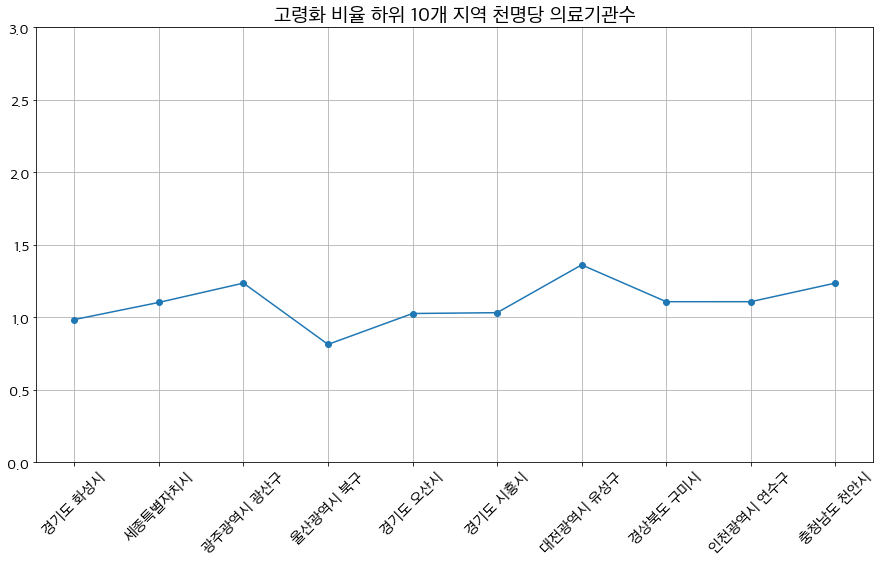

In [28]:
#의료기관수
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(qq['행정구역'], qq['천명당의료기관수'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 하위 10개 지역 천명당 의료기관수",size=20);
plt.ylim(0,3)

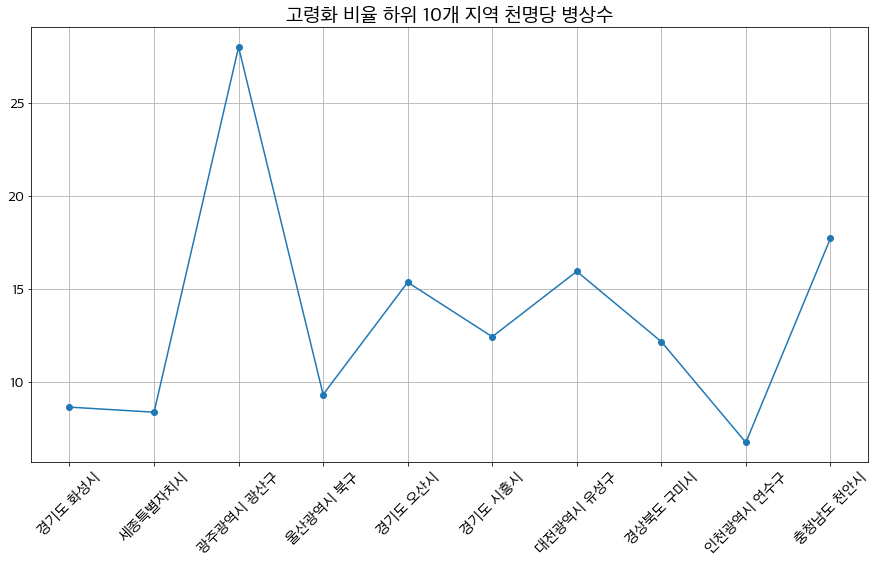

In [29]:
#천명당병상수
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(qq['행정구역'], qq['천명당병상수'], marker='o')
plt.grid(True)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.title("고령화 비율 하위 10개 지역 천명당 병상수",size=20);

In [33]:
qq['행정구역']

0      경기도 화성시
1      세종특별자치시
2    광주광역시 광산구
3     울산광역시 북구
4      경기도 오산시
5      경기도 시흥시
6    대전광역시 유성구
7     경상북도 구미시
8    인천광역시 연수구
9     충청남도 천안시
Name: 행정구역, dtype: object

<AxesSubplot:xlabel='행정구역', ylabel='count'>

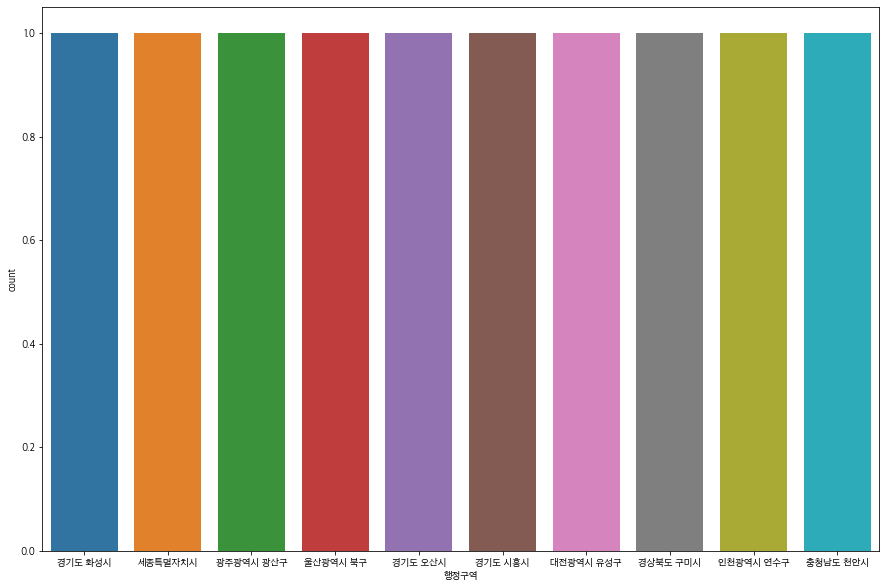

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(x=qq['행정구역'],data=df)

<AxesSubplot:ylabel='천명당병상수'>

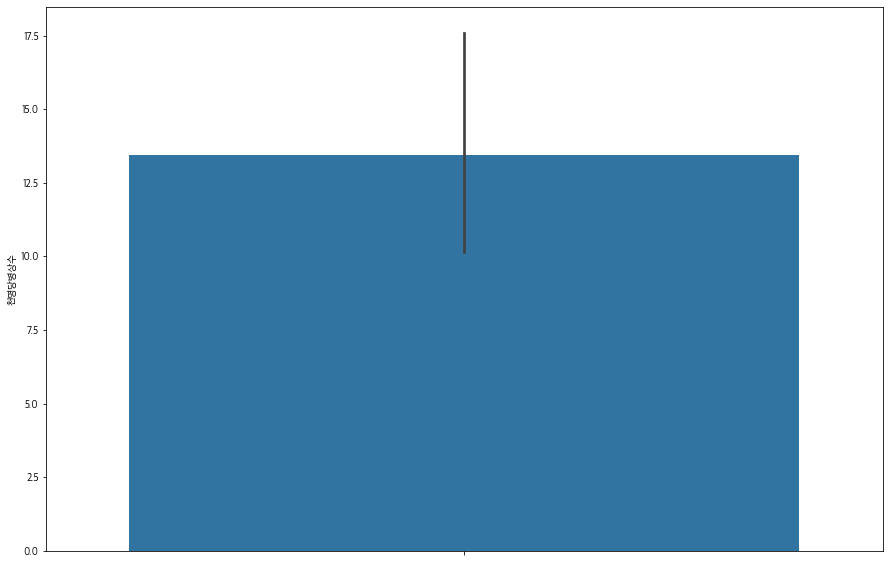

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(y='천명당병상수', data=qq)

<AxesSubplot:xlabel='행정구역', ylabel='천명당병상수'>

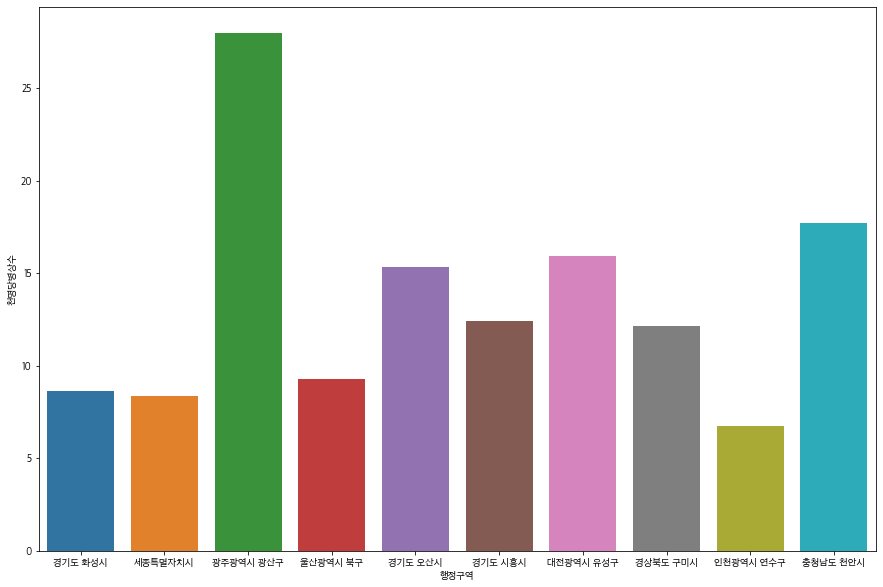

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='행정구역', y='천명당병상수', data=qq)